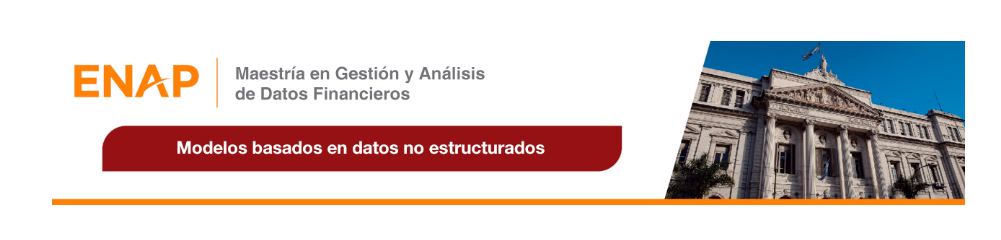

#          

# <center> **MAESTRÍA EN GESTIÓN Y ANÁLISIS DE DATOS FINANCIEROS** </center>

# <center> **M71V. 09 - MODELOS BASADOS EN DATOS NO ESTRUCTURADOS** </center>

# <center> **TRABAJO FINAL** </center>

# <center> **PROCESAMIENTO DE DATOS DE TEXTO** </center>


**DOCENTE:**

- GARCIA FRONTI, JAVIER IGNACIO

**ESTUDIANTE:**

-	VIZZO, MARIANO

# **1. INTRODUCCIÓN**

## **1.1. Título del trabajo práctico**

**"Uso de K-Means, BERT y modelos predictivos para clasificar documentos relevantes para obtener un marco teórico en un Trabajo Final de Maestría que refiere a la predicción de decisiones de inversión de los usuarios de una wallet (perteneciente a una Fintech Argentina)"**

## **1.2. Definición del problema**

Muchos investigadores enfrentan el desafío de que sus conjuntos de datos contienen artículos que no son relevantes para su pregunta de investigación. Por ejemplo, si el objetivo es encontrar documentos relacionados con la predicción de decisiones de inversión de los usuarios de una wallet de Fintech, los investigadores deben lidiar con términos de búsqueda ambiguos.

Las palabras "fintech", "inversión", "educación financiera", "inclusión financiera" o "aprendizaje automático" conducen a muchos artículos relevantes para la investigación, pero también a artículos que no lo son (por ejemplo, artículos sobre educación financiera de estudiantes universitarios, aprendizaje de los estudiantes, etc.). Al utilizar técnicas avanzadas de procesamiento de lenguaje natural (NLP) y métodos de clasificación, este enfoque permite excluir estos artículos sin tener que combinar términos de búsqueda específicos. Además, el mismo código también se puede utilizar para eliminar o preferir ciertos géneros, como publicidad, noticias deportivas, etc.

Para abordar este problema, se utilizarán dos etapas principales:

- **Agrupación de documentos utilizando K-Means.**

- **Clasificación de relevancia utilizando BERT en conjunto de datos de texto con diferentes modelos predictivos de clasificación.**

Adicionalmente, se aplicará un **Modelamiento de Tópicos utilizando LDA.**

## **1.3. Objetivos**

- El objetivo general del trabajo práctico es aplicar técnicas avanzadas de procesamiento de lenguaje natural (NLP) y métodos de clasificación para identificar y clasificar documentos académicos y de investigación que sean relevantes para obtener un marco teórico en un Trabajo Final de Maestría que refiere a la predicción de decisiones de inversión de los usuarios de una wallet de una Fintech.

- En aquellos casos que el documento académico o de investigación seleccionado se relacione o contribuya a mejorar el marco teórico de mi Trabajo Final de Maestría, será clasificado como **"Relevante"**, en caso contrario, será clasificado como **"Irrelevante".**

# **2. DESCRIPCIÓN DEL CORPUS DE DOCUMENTOS EN PDFs**

Se instalan e importan las librerías necesarias para realizar el preprocesamiento de los textos.

In [ ]:
# Instalar librerías

!pip install pdfminer.six

In [ ]:
from pdfminer.high_level import extract_text
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Conexión con drive
from google.colab import drive
drive.mount('/content/drive')

## **2.1. Recopilación de datos**

Para analizar las tendencias tecnológicas en Fintech, se realizó una búsqueda exhaustiva de informes y documentos en formato PDF en varias fuentes confiables:

- **Google Scholar:** Plataforma esencial para literatura académica, incluyendo artículos de revistas y tesis.

- **ResearchGate:** Red social para científicos que comparten y colaboran en investigaciones.

- **ScienceDirect:** Base de datos líder en investigación científica con acceso a artículos de revistas y capítulos de libros.

- **Deloitte Insights:** Proporciona investigaciones sobre innovación tecnológica en diversos sectores, incluyendo Fintech.

- **PwC Publications:** Informes y estudios de PwC sobre tecnología y servicios financieros.

- **KPMG Insights:** Publicaciones de KPMG sobre la evolución de la tecnología financiera.

- **Banco Mundial:** Informes sobre el impacto de la tecnología financiera en economías emergentes.

- **Fondo Monetario Internacional (FMI):** Análisis sobre cómo las tecnologías financieras transforman los sistemas financieros globales.

**Metodología**

- **Identificación de Palabras Clave:** "inclusión financiera", "fintech y big data", "aprendizaje automático", "machine learning", "educación financiera", etc.

- **Búsqueda y Descarga:** Realización de búsquedas en las plataformas mencionadas y descarga de documentos pertinentes.

- **Filtrado y Selección:** Revisión de los documentos para asegurar su relevancia y calidad, sin embargo, se consideraron documentos no relevantes para el análisis.

### **2.1.1. Importación y lectura de los PDFs**

Importación y lectura de los PDFs.



In [ ]:
# Función para leer el contenido de un PDF
def read_pdf(file_path):
    return extract_text(file_path)

# Directorios donde están almacenados los PDFs en Google Drive para cada corpus
directorios_corpus = [
    '/content/drive/MyDrive/Modelos Basados en Datos No Estructurados UBA/Corpus/Corpus_1',
    '/content/drive/MyDrive/Modelos Basados en Datos No Estructurados UBA/Corpus/Corpus_2',
    '/content/drive/MyDrive/Modelos Basados en Datos No Estructurados UBA/Corpus/Corpus_3',
    '/content/drive/MyDrive/Modelos Basados en Datos No Estructurados UBA/Corpus/Corpus_4',
    '/content/drive/MyDrive/Modelos Basados en Datos No Estructurados UBA/Corpus/Corpus_5',
    '/content/drive/MyDrive/Modelos Basados en Datos No Estructurados UBA/Corpus/Corpus_6'
]

# Diccionario para almacenar los textos de los PDFs de cada corpus
pdf_texts = {}

# Leer y almacenar el contenido de los PDFs de cada corpus
for directorio in directorios_corpus:
    corpus_name = os.path.basename(directorio)
    pdf_texts[corpus_name] = {}
    for filename in os.listdir(directorio):
        if filename.endswith('.pdf'):
            file_path = os.path.join(directorio, filename)
            pdf_texts[corpus_name][filename] = read_pdf(file_path)

In [ ]:
# Imprimir el texto extraído del primer PDF
first_pdf = list(pdf_texts.keys())[0]
print(pdf_texts[first_pdf])

Convertir los Textos en DataFrames Separados

In [ ]:
# Diccionario para almacenar los DataFrames de cada corpus
dataframes_corpus = {}

# Convertir los textos de cada corpus en un DataFrame separado
for corpus_name, textos in pdf_texts.items():
    data = {'filename': list(textos.keys()), 'text': list(textos.values())}
    dataframes_corpus[corpus_name] = pd.DataFrame(data)

# Acceder a los DataFrames de cada corpus por separado
df_1 = dataframes_corpus['Corpus_1']
df_2 = dataframes_corpus['Corpus_2']
df_3 = dataframes_corpus['Corpus_3']
df_4 = dataframes_corpus['Corpus_4']
df_5 = dataframes_corpus['Corpus_5']
df_6 = dataframes_corpus['Corpus_6']

# Ejemplo: Imprimir los primeros registros de df_1
print(df_1.head())

Agrupar los Dataframe en uno solo

In [ ]:
# Lista de DataFrames a unir
dataframes = [df_1, df_2, df_3, df_4, df_5, df_6]

# Unir todos los DataFrames en un solo DataFrame
df_original = pd.concat(dataframes, ignore_index=True)

# Imprimir los primeros registros del DataFrame unificado
df_original

In [ ]:
# Guardar el DataFrame original con un carácter de escape
df_original.to_csv('corpus_original.csv', index=False, escapechar='\\')

In [ ]:
# Cargar el DataFrame
df = pd.read_csv('/content/drive/MyDrive/corpus_original.csv')
df

### **2.1.2. Interfaz de usuario interactiva**

Se crea una interfaz simple utilizando **ipywidgets**. Esto permite revisar cada documento y asignar etiquetas de "relevante" o "irrelevante" de forma interactiva.

Para el presente trabajo se consideran:

- **Relevantes:** Aquellos documentos relacionados a la temática "Fintech", con el fin de obtener un marco teórico en mi Trabajo Final de Maestría.

- **Irrelevantes:** Aquellos documentos que no están relacionado a la temática mencionada anteriormente y, en general, son documentos que se relacionan con la educación en el marco universitario (dado que al momento de realizar las búsquedas, el algoritmo de las diferentes fuentes de datos, relacionaron palabras claves con estos documentos irrelevantes para el análisis en cuestión).

**¿Cómo funciona?**

   **1. Cargar y mostrar documentos:** Se carga el DataFrame Original y se muestra el contenido del primer documento con su "Título" y "Descripción" posterior. Esto le permite a la persona que utilice el código, obtener un rápida visión resumida de los PDFs que conforman el corpus.

   **2. Interfaz de usuario:** Se utiliza ipywidgets para crear botones interactivos que permiten etiquetar cada documento como "relevante" o "irrelevante".

   **3. Actualizar etiquetas:** Al hacer clic en uno de los botones, el DataFrame se actualiza con la etiqueta correspondiente y se muestra el siguiente documento.

   **4. Guardar el trabajo:** Una vez que etiquetados todos los documentos, se guardará el DataFrame en un archivo CSV.

A continuación, se procede a crear la interfaz interactiva para etiquetar los documentos y aplicar los pasos mencionados anteriormente:

In [ ]:
pip install ipywidgets

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
# Añadir una columna para las etiquetas
df['label'] = ''

# Añadir una columna para las etiquetas
if 'label' not in df.columns:
    df['label'] = ''

# Índice del documento actual
index = 0

# Función para mostrar el documento actual
def show_document(index):
    if index < len(df):
        clear_output(wait=True)
        display(widgets.HTML(f"<h2>{df.loc[index, 'filename']}</h2>"))
        display(widgets.HTML(f"<p>{df.loc[index, 'text'][:2000]}</p>"))  # Mostrar los primeros 2000 caracteres
        display(label_buttons)
    else:
        clear_output(wait=True)
        display(widgets.HTML("<h2>Todos los documentos están etiquetados</h2>"))

# Función para manejar el etiquetado
def label_document(label):
    global index
    df.at[index, 'label'] = label
    index += 1
    show_document(index)

# Botones para etiquetar
relevant_button = widgets.Button(description="Relevant")
irrelevant_button = widgets.Button(description="Irrelevant")

# Conectar los botones con las funciones de etiquetado
relevant_button.on_click(lambda b: label_document('relevant'))
irrelevant_button.on_click(lambda b: label_document('irrelevant'))

# Contenedor para los botones
label_buttons = widgets.HBox([relevant_button, irrelevant_button])

# Mostrar el primer documento y los botones
show_document(index)

In [ ]:
# Visualizar el dataframe con etiquetas
df

### **2.1.3. Guardar las etiquetas**

Después de etiquetar los documentos, se guarda el DataFrame actualizado con las etiquetas:

In [ ]:
# Guardar el DataFrame actualizado con las etiquetas
df.to_csv('papers_labeled.csv', index=False, escapechar='\\')

In [ ]:
# Cargar el DataFrame
df = pd.read_csv('/content/drive/MyDrive/papers_labeled.csv')

## **2.2. Análisis exploratorio**

### **2.2.1. Frecuencia de documentos**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contar las frecuencias de las etiquetas
label_counts = df['label'].value_counts()
print(label_counts)

# Visualización de la distribución de etiquetas
plt.figure(figsize=(10, 6))
sns.countplot(y='label', data=df, palette='viridis')
plt.title('Frecuencia de Documentos Relevantes e Irrelevantes')
plt.xlabel('Frecuencia')
plt.ylabel('Etiqueta')
plt.show()

**Interpretación del gráfico:**

El conjunto de datos se encuentra significativamente desbalanceado, sin embargo, se procede a continuar con procesamiento de datos y su posterior análisis.

Luego, en el apartado **"5.4. SMOTE: Técnica de balanceo de clases"**, se corrige el desbalanceo y se comparan los resultados de los diferentes modelos, verificando que existen mejoras en las predicciones al aplicar la técnica mencionada.

### **2.2.2. Histograma de longitudes de textos**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Calcular las longitudes de los textos
df['length'] = df['text'].apply(lambda x: len(x.split()))

# Gráfico de histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['length'], bins=10, kde=True, palette='viridis')
plt.title('Distribución de longitudes de textos')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.show()

**Interpretación del gráfico:**

 - La mayor parte de los textos tienen un número relativamente bajo de palabras. Esto se observa en la alta frecuencia de textos con una longitud de hasta 25.000 palabras.

- Hay pocos textos con una longitud extremadamente alta, como se ve en los valores más altos en el eje X (hasta 200.000 palabras).

- **Razones para esta distribución:**

   **1. Variedad en el tipo de Documentos:** Los documentos varían ampliamente en longitud debido a la naturaleza de su contenido. Por ejemplo, algunos artículos son cortos mientras que otros pueden ser reportes extensos o libros.

   **2. Datos anómalos:** Los textos extremadamente largos pueden ser datos anómalos o pueden representar documentos muy extensos como libros completos, tesis, o reportes detallados.

   **3. Difusión de contenidos:** La mayoría de los documentos del corpus son artículos de investigación, papers académicos, o reportes cortos.

### **2.2.3. Frecuencias de palabras (sin eliminar stopwords)**

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [ ]:
# Preprocesamiento del texto sin eliminar stopwords
df['text_no_clean'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in string.punctuation]))

# Calcular la frecuencia de todas las palabras
all_words_no_clean = ' '.join(df['text_no_clean']).split()
word_freq_no_clean = Counter(all_words_no_clean)
common_words_no_clean = word_freq_no_clean.most_common(20)

# Preparar los datos para el gráfico
words_no_clean, counts_no_clean = zip(*common_words_no_clean)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts_no_clean), y=list(words_no_clean), palette='viridis')
plt.title('Frecuencia de palabras (sin eliminar stopwords)')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.show()

**Interpretación del Gráfico:**

El gráfico muestra la frecuencia de las palabras más comunes del corpus de documentos sin eliminar las stopwords (palabras comunes que a menudo no aportan mucho significado, como "de", "la", "y", "en", "que", etc.). La mayoría de las palabras más frecuentes son stopwords, lo cual es esperable en un análisis de texto no procesado.

In [ ]:
# Crear un DataFrame con las palabras más comunes y sus frecuencias
common_words_df = pd.DataFrame(common_words_no_clean, columns=['Palabra', 'Frecuencia'])

# Mostrar la tabla de las palabras más frecuentes
print(common_words_df)

# **3. CLUSTERING DE TEXTOS CON K-MEANS**

En este apartado se aplicarán simples pasos para lograr identificar tres grupos de documentos:

- Se preprocesa el texto para eliminar puntuación y stopwords.

- Se vectoriza el texto usando TF-IDF.

- Se crea clusters usando K-Means.

- Se visualiza la cantidad de documentos por grupo y la distribución de longitudes
de documentos por grupo.

- Se visualiza los clusters en un espacio bidimensional utilizando PCA.

## **3.1. Preprocesamiento de textos**

- Eliminar stopwords y puntuación de los textos para obtener una representación limpia y normalizada de los documentos.

- Aplicar técnicas de lematización para reducir las palabras a su forma base y mejorar la consistencia de los datos.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [ ]:
# Lista predefinida de stopwords en español
stop_words = set([
    "de", "la", "que", "el", "en", "y", "a", "los", "del", "se", "las", "por", "un", "para", "con", "no", "una",
    "su", "al", "lo", "como", "más", "pero", "sus", "le", "ya", "o", "este", "sí", "porque", "esta", "entre",
    "cuando", "muy", "sin", "sobre", "también", "me", "hasta", "hay", "donde", "quien", "desde", "todo", "nos",
    "durante", "todos", "uno", "les", "ni", "contra", "otros", "ese", "eso", "ante", "ellos", "e", "esto",
    "mí", "antes", "algunos", "qué", "unos", "yo", "otro", "otras", "otra", "él", "tanto", "esa", "estos",
    "mucho", "quienes", "nada", "muchos", "cual", "poco", "ella", "estar", "estas", "algunas", "algo",
    "nosotros", "mi", "mis", "tú", "te", "ti", "tu", "tus", "ellas", "nosotras", "vosotros", "vosotras",
    "os", "mío", "mía", "míos", "mías", "tuyo", "tuya", "tuyos", "tuyas", "suyo", "suya", "suyos", "suyas",
    "nuestro", "nuestra", "nuestros", "nuestras", "vuestro", "vuestra", "vuestros", "vuestras", "esos",
    "esas", "estoy", "estás", "está", "estamos", "estáis", "están", "esté", "estés", "estemos", "estéis",
    "estén", "estaré", "estarás", "estará", "estaremos", "estaréis", "estarán", "estaría", "estarías",
    "estaríamos", "estaríais", "estarían", "estaba", "estabas", "estábamos", "estabais", "estaban", "estuve",
    "estuviste", "estuvo", "estuvimos", "estuvisteis", "estuvieron", "estuviera", "estuvieras", "estuviéramos",
    "estuvierais", "estuvieran", "estuviese", "estuvieses", "estuviésemos", "estuvieseis", "estuviesen",
    "estando", "estado", "estada", "estados", "estadas", "estad", "he", "has", "ha", "hemos", "habéis",
    "han", "haya", "hayas", "hayamos", "hayáis", "hayan", "habré", "habrás", "habrá", "habremos", "habréis",
    "habrán", "habría", "habrías", "habríamos", "habríais", "habrían", "había", "habías", "habíamos",
    "habíais", "habían", "hube", "hubiste", "hubo", "hubimos", "hubisteis", "hubieron", "hubiera",
    "hubieras", "hubiéramos", "hubierais", "hubieran", "hubiese", "hubieses", "hubiésemos", "hubieseis",
    "hubiesen", "habiendo", "habido", "habida", "habidos", "habidas", "soy", "eres", "es", "somos",
    "sois", "son", "sea", "seas", "seamos", "seáis", "sean", "seré", "serás", "será", "seremos",
    "seréis", "serán", "sería", "serías", "seríamos", "seríais", "serían", "era", "eras", "éramos",
    "erais", "eran", "fui", "fuiste", "fue", "fuimos", "fuisteis", "fueron", "fuera", "fueras",
    "fuéramos", "fuerais", "fueran", "fuese", "fueses", "fuésemos", "fueseis", "fuesen", "sintiendo",
    "sentido", "sentida", "sentidos", "sentidas", "siente", "sentid", "tengo", "tienes", "tiene",
    "tenemos", "tenéis", "tienen", "tenga", "tengas", "tengamos", "tengáis", "tengan", "tendré",
    "tendrás", "tendrá", "tendremos", "tendréis", "tendrán", "tendría", "tendrías", "tendríamos",
    "tendríais", "tendrían", "tenía", "tenías", "teníamos", "teníais", "tenían", "tuve", "tuviste",
    "tuvo", "tuvimos", "tuvisteis", "tuvieron", "tuviera", "tuvieras", "tuviéramos", "tuvierais",
    "tuvieran", "tuviese", "tuvieses", "tuviésemos", "tuvieseis", "tuviesen", "teniendo", "tenido",
    "tenida", "tenidos", "tenidas", "tened"
])

# Preprocesamiento del texto
def preprocess_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['text_clean'] = df['text'].apply(preprocess_text)

# Añadir columna de longitud de texto
df['length'] = df['text'].apply(lambda x: len(x.split()))

## **3.2. Vectorización de textos**

Convertir los textos preprocesados en vectores numéricos utilizando el método TF-IDF, facilitando así la aplicación de algoritmos de clustering y clasificación.

In [ ]:
# Vectorización del texto usando TF-IDF
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df['text_clean'])

# Creación de clusters usando KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

## **3.3. Gráfico de cantidad de documentos por grupo**

In [ ]:
# Visualización de la cantidad de documentos por grupo
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df, palette='viridis')
plt.title('Cantidad de Documentos por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Documentos')
plt.show()

**Interpretación del gráfico:**

- El grupo 1 tiene la mayor cantidad de documentos (44), seguido por el grupo 0 (13) y el grupo 2 (12).

- Esto sugiere una distribución desigual de documentos entre los clusters, con el grupo 1 dominando en términos de cantidad.

In [ ]:
# Crear una tabla con la cantidad de documentos por grupos
cluster_counts = df['cluster'].value_counts().reset_index()
cluster_counts.columns = ['Grupo', 'Cantidad de Documentos']

# Mostrar la tabla
print(cluster_counts)

## **3.4. Gráfico de distribución de longitudes de documentos por grupo**

In [ ]:
# Visualización de las longitudes de los documentos por grupo
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='length', data=df, palette='viridis')
plt.title('Distribución de Longitudes de Documentos por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Longitud del Documento')
plt.show()

**Interpretación del gráfico:**

- El grupo 1 tiene una mayor variabilidad en las longitudes de los documentos y algunos outliers extremos, como se observa en los puntos fuera de la caja.

- Los grupos 0 y 2 tienen una longitud de documento más consistente, con menos variabilidad.

- La longitud de los documentos puede estar influenciada por el contenido específico de cada cluster, sugiriendo que los documentos largos en el grupo 1 podrían tratar temas más extensos o detallados.

## **3.5. Gráfico de visualización de clusters de documentos**

In [ ]:
# Reducción de dimensionalidad para visualización
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X.toarray())
colors = sns.color_palette('viridis', n_colors=3)

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_axis, hue=df['cluster'], palette=colors, style=df['cluster'], markers=['X']*3)
plt.title('Visualización de Clusters de Documentos')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

**Interpretación del gráfico:**

- Los documentos están claramente separados en tres clusters distintos en el espacio 2D.

- Algunos clusters están más dispersos que otros, indicando que la variabilidad interna de los documentos en esos clusters es mayor.

- El grupo 1 (verde) está más concentrado, lo que sugiere que los documentos en este cluster son más similares entre sí.

- El grupo 0 (azul) y el grupo 2 (verde claro) están más dispersos, lo que sugiere mayor diversidad en el contenido de los documentos de estos clusters.

La **alta variabilidad en la longitud de los documentos** en ciertos clusters (especialmente el grupo 1) puede indicar la presencia de documentos de naturaleza diversa dentro de ese cluster.

Ante esta situación, en el apartado **"6. TOPIC MODELING CON LDA"**, se realizará una subdivisión de estos clusters aplicando técnicas adicionales de refinamiento, en las cuales se verifica mejoras en la cohesión interna.

# **4. IMPLEMENTACIÓN DE BERT**

Ahora, se utiliza **BERT (Bidirectional Encoder Representations from Transformers)** para obtener representaciones de alta calidad de los documentos, capturando el contexto y el significado de las palabras en el texto.

## **4.1. Preprocesamiento de textos**

Se instalan las librerías necesarias:

In [ ]:
pip install nltk

In [ ]:
pip install pandas

In [ ]:
pip install nltk pyspellchecker unidecode

In [ ]:
# Se instalan las librerías necesarias
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import unidecode

In [ ]:
# Descargar recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
# Cargar el DataFrame etiquetado
df = pd.read_csv('/content/drive/MyDrive/papers_labeled.csv')

In [ ]:
# Verificar si hay valores nulos en el DataFrame
print(df.isnull().sum())

In [ ]:
# Eliminar filas con valores nulos
df = df.dropna()

# Verificar nuevamente si hay valores nulos para asegurarse de que se han eliminado
print(df.isnull().sum())

In [ ]:
# Lista predefinida de stopwords en español
stop_words = set(stopwords.words('spanish'))
stop_words

In [ ]:
# Inicializar lematizador
lemmatizer = WordNetLemmatizer()

In [ ]:
# Función para limpiar el texto
def clean_text(text):
    # Eliminar caracteres especiales y dígitos
    text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

# Función para normalizar el texto
def normalize_text(text):
    # Convertir a minúsculas y quitar tildes
    text = text.lower()
    text = unidecode.unidecode(text)
    return text

# Función para eliminar stopwords y tokenizar
def remove_stopwords_and_tokenize(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# Función para lematizar el texto
def lemmatize_text(words):
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [ ]:
# Aplicar las funciones de preprocesamiento
df['cleaned_text'] = df['text'].apply(clean_text)
df['cleaned_text'] = df['cleaned_text'].apply(normalize_text)
df['tokenized_text'] = df['cleaned_text'].apply(remove_stopwords_and_tokenize)
df['lemmatized_text'] = df['tokenized_text'].apply(lemmatize_text)

# Mostrar las primeras filas del DataFrame
df.head()

In [ ]:
# Guardar el DataFrame preprocesado
df.to_csv('papers_preprocessed.csv', index=False)

In [ ]:
# Cargar el DataFrame
df = pd.read_csv('/content/papers_preprocessed.csv')

## **4.2. Gráfico de frecuencias de palabras**

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Unir todos los textos lematizados en una sola lista de palabras
all_words = ' '.join(df['lemmatized_text']).split()

# Contar la frecuencia de cada palabra
word_freq = Counter(all_words)

# Obtener las 20 palabras más comunes
common_words = word_freq.most_common(20)
print(common_words)

# Visualización de las palabras más comunes
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('20 Palabras Más Frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.show()

**Interpretación del gráfico:**

- **Palabras Comunes en Inglés:** Las palabras más frecuentes como "the", "of", "and", "in", "to", "is", "for", "that" son stopwords comunes en inglés.
Esto indica que algunas palabras comunes no se han eliminado durante el preprocesamiento, lo cual podría afectar la calidad del análisis.

- **Términos Relevantes para Fintech:** Palabras como "fintech", "servicios", "empresas", "pago", "financiera", "informacion", "datos", "argentina" son relevantes para el dominio de Fintech.


In [ ]:
# Crear un DataFrame con las palabras más comunes y sus frecuencias
common_words_df = pd.DataFrame(common_words, columns=['Palabra', 'Frecuencia'])

# Mostrar la tabla de las 20 palabras más frecuentes
print(common_words_df)

## **4.3. Gráfico de nubes de palabras**

### **4.3.1. Primera versión**

In [ ]:
from wordcloud import WordCloud

# Generar la nube de palabras
text = ' '.join(df['lemmatized_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras')
plt.show()

**Interpretación de la Nube de Palabras:**



- La imagen de la nube de palabras muestra las palabras más frecuentes en el texto lematizado de tus documentos. Las palabras más grandes y centradas son las que aparecen con mayor frecuencia en el texto. En esta nube de palabras, podemos observar que términos como "ma", "si", "solo", "vez", "cada" y "ello" son muy comunes. Sin embargo, estas palabras no aportan mucho valor en términos de análisis de contenido porque son palabras vacías o stopwords (palabras muy comunes en el idioma que no aportan significado específico).



**Mejoras que se aplicarán:**

- **Eliminar Stopwords:** Aunque ya ya se ha realizado un preprocesamiento para eliminar stopwords, parece que algunas palabras comunes no están siendo filtradas.

- **Personalizar la lista de Stopwords:** Se agregarán palabras específicas del dominio que no sean útiles para el análisis.

- **Lematización y stemming:** Se verifica que la lematización o stemming esté funcionando correctamente para reducir las palabras a su forma base.

- **Ajustes en la visualización:** Ajustar parámetros como el tamaño máximo de las palabras, los colores, y la forma de la nube para una mejor visualización.

### **4.3.2. Segunda versión**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Lista de stopwords adicionales
additional_stopwords = set(["que", "de", "la", "en", "el", "para", "por", "con", "lo", "una", "los", "del", "se", "las", "un", "su", "al", "es", "más", "como", "si",
    'a', 'acuerdo', 'adelante', 'ademas', 'además', 'afirmó', 'agregó', 'ahi', 'ahora', 'ahí', 'al', 'algo', 'alguna', 'algunas',
    'alguno', 'algunos', 'algún', 'alli', 'allí', 'alrededor', 'ambos', 'ante', 'anterior', 'antes', 'apenas', 'aproximadamente',
    'aquel', 'aquella', 'aquellas', 'aquello', 'aquellos', 'aqui', 'aquél', 'aquélla', 'aquéllas', 'aquéllos', 'aquí', 'arriba',
    'aseguró', 'asi', 'así', 'atras', 'aun', 'aunque', 'añadió', 'aún', 'bajo', 'bastante', 'bien', 'breve', 'buen', 'buena', 'buenas',
    'bueno', 'buenos', 'cada', 'casi', 'cierta', 'ciertas', 'cierto', 'ciertos', 'cinco', 'claro', 'comentó', 'como', 'con', 'conmigo',
    'conocer', 'conseguimos', 'conseguir', 'considera', 'consideró', 'consigo', 'consigue', 'consiguen', 'consigues', 'contigo', 'contra',
    'creo', 'cual', 'cuales', 'cualquier', 'cuando', 'cuanta', 'cuantas', 'cuanto', 'cuantos', 'cuatro', 'cuenta', 'cuál', 'cuáles',
    'cuándo', 'cuánta', 'cuántas', 'cuánto', 'cuántos', 'cómo', 'da', 'dado', 'dan', 'dar', 'de', 'debajo', 'debe', 'deben', 'debido',
    'decir', 'dejó', 'del', 'delante', 'demasiado', 'demás', 'dentro', 'deprisa', 'desde', 'despacio', 'despues', 'después', 'detras',
    'detrás', 'dia', 'dias', 'dice', 'dicen', 'dicho', 'dieron', 'diez', 'diferente', 'diferentes', 'dijeron', 'dijo', 'dio', 'doce',
    'donde', 'dos', 'durante', 'día', 'días', 'dónde', 'e', 'el', 'ella', 'ellas', 'ello', 'ellos', 'embargo', 'en', 'encima', 'encuentra',
    'enfrente', 'enseguida', 'entonces', 'entre', 'era', 'eramos', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos',
    'esta', 'estaba', 'estaban', 'estado', 'estados', 'estais', 'estamos', 'estan', 'estar', 'estará', 'estas', 'este', 'esto', 'estos',
    'estoy', 'estuvo', 'está', 'están', 'excepto', 'existe', 'existen', 'explicó', 'expresó', 'fin', 'final', 'fue', 'fuera', 'fueron',
    'fui', 'fuimos', 'gran', 'grande', 'grandes', 'ha', 'haber', 'habia', 'habla', 'hablan', 'habrá', 'había', 'habían', 'hace', 'haceis',
    'hacemos', 'hacen', 'hacer', 'hacerlo', 'haces', 'hacia', 'haciendo', 'hago', 'han', 'hasta', 'hay', 'haya', 'he', 'hecho', 'hemos',
    'hicieron', 'hizo', 'hoy', 'hubo', 'igual', 'incluso', 'indicó', 'informo', 'informó', 'ir', 'junto', 'la', 'lado', 'largo', 'las',
    'le', 'les', 'llegó', 'lleva', 'llevar', 'lo', 'los', 'luego', 'mal', 'manera', 'manifestó', 'mas', 'mayor', 'me', 'mediante', 'medio',
    'mejor', 'mencionó', 'menos', 'menudo', 'mi', 'mia', 'mias', 'mientras', 'mio', 'mios', 'mis', 'misma', 'mismas', 'mismo', 'mismos',
    'modo', 'mucha', 'muchas', 'mucho', 'muchos', 'muy', 'más', 'mí', 'mía', 'mías', 'mío', 'míos', 'nada', 'nadie', 'ni', 'ninguna',
    'ningunas', 'ninguno', 'ningunos', 'ningún', 'no', 'nos', 'nosotras', 'nosotros', 'nuestra', 'nuestras', 'nuestro', 'nuestros',
    'nueva', 'nuevas', 'nueve', 'nuevo', 'nuevos', 'nunca', 'o', 'ocho', 'once', 'os', 'otra', 'otras', 'otro', 'otros', 'para', 'parece',
    'parte', 'partir', 'pasada', 'pasado', 'paìs', 'peor', 'pero', 'pesar', 'poca', 'pocas', 'poco', 'pocos', 'podeis', 'podemos', 'poder',
    'podria', 'podriais', 'podriamos', 'podrian', 'podrias', 'podrá', 'podrán', 'podría', 'podrían', 'poner', 'por', 'porque', 'posible',
    'primer', 'primera', 'primero', 'primeros', 'pronto', 'propia', 'propias', 'propio', 'propios', 'proximo', 'próximo', 'próximos',
    'pudo', 'pueda', 'puede', 'pueden', 'puedo', 'pues', 'qeu', 'que', 'quedó', 'queremos', 'quien', 'quienes', 'quiere', 'quiza', 'quizas',
    'quizá', 'quizás', 'quién', 'quiénes', 'qué', 'realizado', 'realizar', 'realizó', 'repente', 'respecto', 'sabe', 'sabeis', 'sabemos',
    'saben', 'saber', 'sabes', 'salvo', 'se', 'sea', 'sean', 'segun', 'segunda', 'segundo', 'según', 'seis', 'ser', 'sera', 'será', 'serán',
    'sería', 'señaló', 'si', 'sido', 'siempre', 'siendo', 'siete', 'sigue', 'siguiente', 'sin', 'sino', 'sobre', 'sois', 'sola', 'solamente',
    'solas', 'solo', 'solos', 'somos', 'son', 'soy', 'su', 'supuesto', 'sus', 'suya', 'suyas', 'suyo', 'suyos', 'sé', 'sí', 'sólo', 'tal',
    'tambien', 'también', 'tampoco', 'tan', 'tanto', 'tarde', 'te', 'temprano', 'tendrá', 'tendrán', 'teneis', 'tenemos', 'tener', 'tenga',
    'tengo', 'tenido', 'tenía', 'tercera', 'tercero', 'ti', 'tiene', 'tienen', 'toda', 'todas', 'todavia', 'todavía', 'todo', 'todos',
    'total', 'tras', 'trata', 'través', 'tres', 'tu', 'tus', 'tuvo', 'tuya', 'tuyas', 'tuyo', 'tuyos', 'tú', 'u', 'ultimo', 'un', 'una',
    'unas', 'uno', 'unos', 'usa', 'usais', 'usamos', 'usan', 'usar', 'usas', 'uso', 'usted', 'ustedes', 'va', 'vais', 'vamos', 'van',
    'varias', 'varios', 'vaya', 'veces', 'ver', 'verdad', 'verdadera', 'verdadero', 'vez', 'vosotras', 'vosotros', 'voy', 'vuestra',
    'vuestras', 'vuestro', 'vuestros', 'y', 'ya', 'yo', 'él', 'www', 'estn','ao','trave','ma','j','pai','ano','caso'])



# Unir la lista de stopwords de NLTK con las adicionales
stopwords = STOPWORDS.union(additional_stopwords)

# Generar el texto completo a partir de la columna 'lemmatized_text'
text = ' '.join(df['lemmatized_text'])

In [ ]:
# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, max_words=200, colormap='viridis').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras Mejorada')
plt.show()

**Interpretación de la Nube de Palabras:**

La imagen de la nube de palabras mejorada muestra que términos como "ma", "si", "solo", "vez", "cada" y "ello" fueron eliminados. Sin embargo se procede a realizar reajustes relacionado a los stopwords en inglés.

Para realizar un análisis de texto más preciso y relevante en español, es importante eliminar las palabras en inglés y otros conectores que no sean de interés. Estas palabras pueden introducir ruido en el análisis y sesgar los resultados.

### **4.3.3. Tercera versión**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords as nltk_stopwords
import nltk
from collections import Counter
import seaborn as sns

In [ ]:
# Descargar las stopwords en inglés de NLTK
nltk.download('stopwords')

# Lista de stopwords adicionales en español
additional_stopwords_es = set(["que", "de", "la", "en", "el", "para", "por", "con", "lo", "una", "los", "del", "se", "las", "un", "su", "al", "es", "más", "como", "si",
    'a', 'acuerdo', 'adelante', 'ademas', 'además', 'afirmó', 'agregó', 'ahi', 'ahora', 'ahí', 'al', 'algo', 'alguna', 'algunas',
    'alguno', 'algunos', 'algún', 'alli', 'allí', 'alrededor', 'ambos', 'ante', 'anterior', 'antes', 'apenas', 'aproximadamente',
    'aquel', 'aquella', 'aquellas', 'aquello', 'aquellos', 'aqui', 'aquél', 'aquélla', 'aquéllas', 'aquéllos', 'aquí', 'arriba',
    'aseguró', 'asi', 'así', 'atras', 'aun', 'aunque', 'añadió', 'aún', 'bajo', 'bastante', 'bien', 'breve', 'buen', 'buena', 'buenas',
    'bueno', 'buenos', 'cada', 'casi', 'cierta', 'ciertas', 'cierto', 'ciertos', 'cinco', 'claro', 'comentó', 'como', 'con', 'conmigo',
    'conocer', 'conseguimos', 'conseguir', 'considera', 'consideró', 'consigo', 'consigue', 'consiguen', 'consigues', 'contigo', 'contra',
    'creo', 'cual', 'cuales', 'cualquier', 'cuando', 'cuanta', 'cuantas', 'cuanto', 'cuantos', 'cuatro', 'cuenta', 'cuál', 'cuáles',
    'cuándo', 'cuánta', 'cuántas', 'cuánto', 'cuántos', 'cómo', 'da', 'dado', 'dan', 'dar', 'de', 'debajo', 'debe', 'deben', 'debido',
    'decir', 'dejó', 'del', 'delante', 'demasiado', 'demás', 'dentro', 'deprisa', 'desde', 'despacio', 'despues', 'después', 'detras',
    'detrás', 'dia', 'dias', 'dice', 'dicen', 'dicho', 'dieron', 'diez', 'diferente', 'diferentes', 'dijeron', 'dijo', 'dio', 'doce',
    'donde', 'dos', 'durante', 'día', 'días', 'dónde', 'e', 'el', 'ella', 'ellas', 'ello', 'ellos', 'embargo', 'en', 'encima', 'encuentra',
    'enfrente', 'enseguida', 'entonces', 'entre', 'era', 'eramos', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos',
    'esta', 'estaba', 'estaban', 'estado', 'estados', 'estais', 'estamos', 'estan', 'estar', 'estará', 'estas', 'este', 'esto', 'estos',
    'estoy', 'estuvo', 'está', 'están', 'excepto', 'existe', 'existen', 'explicó', 'expresó', 'fin', 'final', 'fue', 'fuera', 'fueron',
    'fui', 'fuimos', 'gran', 'grande', 'grandes', 'ha', 'haber', 'habia', 'habla', 'hablan', 'habrá', 'había', 'habían', 'hace', 'haceis',
    'hacemos', 'hacen', 'hacer', 'hacerlo', 'haces', 'hacia', 'haciendo', 'hago', 'han', 'hasta', 'hay', 'haya', 'he', 'hecho', 'hemos',
    'hicieron', 'hizo', 'hoy', 'hubo', 'igual', 'incluso', 'indicó', 'informo', 'informó', 'ir', 'junto', 'la', 'lado', 'largo', 'las',
    'le', 'les', 'llegó', 'lleva', 'llevar', 'lo', 'los', 'luego', 'mal', 'manera', 'manifestó', 'mas', 'mayor', 'me', 'mediante', 'medio',
    'mejor', 'mencionó', 'menos', 'menudo', 'mi', 'mia', 'mias', 'mientras', 'mio', 'mios', 'mis', 'misma', 'mismas', 'mismo', 'mismos',
    'modo', 'mucha', 'muchas', 'mucho', 'muchos', 'muy', 'más', 'mí', 'mía', 'mías', 'mío', 'míos', 'nada', 'nadie', 'ni', 'ninguna',
    'ningunas', 'ninguno', 'ningunos', 'ningún', 'no', 'nos', 'nosotras', 'nosotros', 'nuestra', 'nuestras', 'nuestro', 'nuestros',
    'nueva', 'nuevas', 'nueve', 'nuevo', 'nuevos', 'nunca', 'o', 'ocho', 'once', 'os', 'otra', 'otras', 'otro', 'otros', 'para', 'parece',
    'parte', 'partir', 'pasada', 'pasado', 'paìs', 'peor', 'pero', 'pesar', 'poca', 'pocas', 'poco', 'pocos', 'podeis', 'podemos', 'poder',
    'podria', 'podriais', 'podriamos', 'podrian', 'podrias', 'podrá', 'podrán', 'podría', 'podrían', 'poner', 'por', 'porque', 'posible',
    'primer', 'primera', 'primero', 'primeros', 'pronto', 'propia', 'propias', 'propio', 'propios', 'proximo', 'próximo', 'próximos',
    'pudo', 'pueda', 'puede', 'pueden', 'puedo', 'pues', 'qeu', 'que', 'quedó', 'queremos', 'quien', 'quienes', 'quiere', 'quiza', 'quizas',
    'quizá', 'quizás', 'quién', 'quiénes', 'qué', 'realizado', 'realizar', 'realizó', 'repente', 'respecto', 'sabe', 'sabeis', 'sabemos',
    'saben', 'saber', 'sabes', 'salvo', 'se', 'sea', 'sean', 'segun', 'segunda', 'segundo', 'según', 'seis', 'ser', 'sera', 'será', 'serán',
    'sería', 'señaló', 'si', 'sido', 'siempre', 'siendo', 'siete', 'sigue', 'siguiente', 'sin', 'sino', 'sobre', 'sois', 'sola', 'solamente',
    'solas', 'solo', 'solos', 'somos', 'son', 'soy', 'su', 'supuesto', 'sus', 'suya', 'suyas', 'suyo', 'suyos', 'sé', 'sí', 'sólo', 'tal',
    'tambien', 'también', 'tampoco', 'tan', 'tanto', 'tarde', 'te', 'temprano', 'tendrá', 'tendrán', 'teneis', 'tenemos', 'tener', 'tenga',
    'tengo', 'tenido', 'tenía', 'tercera', 'tercero', 'ti', 'tiene', 'tienen', 'toda', 'todas', 'todavia', 'todavía', 'todo', 'todos',
    'total', 'tras', 'trata', 'través', 'tres', 'tu', 'tus', 'tuvo', 'tuya', 'tuyas', 'tuyo', 'tuyos', 'tú', 'u', 'ultimo', 'un', 'una',
    'unas', 'uno', 'unos', 'usa', 'usais', 'usamos', 'usan', 'usar', 'usas', 'uso', 'usted', 'ustedes', 'va', 'vais', 'vamos', 'van',
    'varias', 'varios', 'vaya', 'veces', 'ver', 'verdad', 'verdadera', 'verdadero', 'vez', 'vosotras', 'vosotros', 'voy', 'vuestra',
    'vuestras', 'vuestro', 'vuestros', 'y', 'ya', 'yo', 'él', 'www', 'estn','ao','trave','ma','j','pai','ano','n','h','et','p','ii','b', 'c','f','caso','g',
    'entidade', 'casos','lugar','momento','punto','pais','linea','general','importante','1','l','iii'])

# Lista de stopwords en inglés
english_stopwords = set(nltk_stopwords.words('english'))

# Unir todas las stopwords
all_stopwords = STOPWORDS.union(additional_stopwords_es).union(english_stopwords)

# Generar el texto completo a partir de la columna 'lemmatized_text'
text = ' '.join(df['lemmatized_text'])

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=all_stopwords, max_words=150, colormap='viridis').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras Mejorada')
plt.show()

**Interpretación de la Nube de Palabras Mejorada:**

- **Palabras Dominantes:** **"fintech", "empresa", "cliente", "proceso", "sistema", "informacion", "usuario"** son algunas de las palabras más destacadas en la nube.
Estas palabras indican los temas centrales del corpus de documentos relacionados con Fintech.

- **Temas Relevantes:**

  - **Empresas y Clientes:** Palabras como "empresa" y "cliente" sugieren que muchos documentos están enfocados en la interacción entre las empresas y sus clientes en el contexto de Fintech.

  - **Procesos y Sistemas:** Términos como "proceso", "sistema", "plataforma" y "servicio" indican que los documentos discuten bastante sobre los procesos operativos y los sistemas utilizados en la industria Fintech.

  - **Tecnología y Desarrollo:** Palabras como "tecnologia", "desarrollo", "innovacion" resaltan la importancia de la innovación tecnológica y el desarrollo continuo en Fintech.

  - **Finanzas y Mercado:** Términos como "financiera", "mercado", "credito", "inversion" subrayan el aspecto financiero y el funcionamiento del mercado dentro del sector Fintech.

- **Inclusión Financiera y Regulación:**

  - **"inclusion financiera":** La presencia de esta frase sugiere que la inclusión financiera es un tema significativo en el corpus.

  - **Regulación y Normativas:** Palabras como "regulacion", "normativa", "ley" indican discusiones sobre el marco regulatorio que afecta a la industria Fintech.

- **Otros Términos Relevantes:**

  - **"usuario", "proyecto", "riesgo", "pago", "servicio":** Estas palabras indican la diversidad de temas y aspectos tratados en los documentos, desde la gestión de riesgos hasta las soluciones de pago.

## **4.4. Vectorización de textos**

In [ ]:
pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización del texto usando TF-IDF
vectorizer = TfidfVectorizer(max_features=100000)  # Puedes ajustar max_features según sea necesario
X = vectorizer.fit_transform(df['lemmatized_text'])

# Mostrar la forma de la matriz TF-IDF
print(X.shape)

In [ ]:
# Convertir la matriz TF-IDF a un DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Añadir la columna de etiquetas al DataFrame
tfidf_df['label'] = df['label']

In [ ]:
# Guardar el DataFrame TF-IDF en un archivo CSV
tfidf_df.to_csv('papers_tfidf.csv', index=False)

## **4.5. Embeddings usando BERT**

In [ ]:
pip install transformers

In [ ]:
pip install torch

In [ ]:
# Importar librerías necesarias
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel

In [ ]:
# Cargar el DataFrame etiquetado
df = pd.read_csv('/content/drive/MyDrive/papers_preprocessed.csv')

In [ ]:
# Inicializar el tokenizer y el modelo de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [ ]:
# Función para obtener los embeddings de BERT
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding=True)
    outputs = model(**inputs)
    # Obtener la última capa oculta
    hidden_states = outputs.last_hidden_state
    # Promediar las representaciones de todos los tokens para obtener una única representación del texto
    embeddings = torch.mean(hidden_states, dim=1)
    return embeddings.detach().numpy()

In [ ]:
# Obtener los embeddings para todos los textos
embeddings = []
for text in df['lemmatized_text']:
    embedding = get_bert_embeddings(text)
    embeddings.append(embedding[0])

# Convertir los embeddings a un DataFrame
embeddings_df = pd.DataFrame(embeddings)

# Añadir la columna de etiquetas al DataFrame
embeddings_df['label'] = df['label']

# Mostrar las primeras filas del DataFrame de embeddings
print(embeddings_df.head())

In [ ]:
# Cargar el DataFrame etiquetado
df = pd.read_csv('/content/drive/MyDrive/papers_preprocessed.csv')

# Inicializar el tokenizer y el modelo de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Función para obtener los embeddings de BERT
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding=True)
    outputs = model(**inputs)
    # Obtener la última capa oculta
    hidden_states = outputs.last_hidden_state
    # Promediar las representaciones de todos los tokens para obtener una única representación del texto
    embeddings = torch.mean(hidden_states, dim=1)
    return embeddings.detach().numpy()

# Obtener los embeddings para todos los textos
embeddings = []
for text in df['lemmatized_text']:
    embedding = get_bert_embeddings(text)
    embeddings.append(embedding[0])

# Convertir los embeddings a un DataFrame
embeddings_df = pd.DataFrame(embeddings)

# Añadir la columna de etiquetas al DataFrame
embeddings_df['label'] = df['label']

# Mostrar las primeras filas del DataFrame de embeddings
print(embeddings_df.head())

# Guardar el DataFrame de embeddings en un archivo CSV
embeddings_df.to_csv('papers_bert_embeddings.csv', index=False)

In [ ]:
# Guardar el DataFrame de embeddings en un archivo CSV
embeddings_df.to_csv('papers_bert_embeddings.csv', index=False)

In [ ]:
# Cargar el DataFrame preprocesado embeddings
embeddings_df = pd.read_csv('papers_bert_embeddings.csv')

# **5. ENTRENAMIENTO DE MODELOS PREDICTIVOS DE CLASIFICACIÓN**

## **5.1. Definición de los modelos**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [ ]:
# Asumiendo que el DataFrame tiene una columna 'label' para las etiquetas y el resto son embeddings
X = embeddings_df.drop(columns=['label'])
y = embeddings_df['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definir los modelos
models = {
    "Regresión Logística": LogisticRegression(max_iter=100000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier()
}

In [ ]:
# Función para evaluar el modelo
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

## **5.2. Resultados de los modelos**

In [ ]:
# Entrenar y evaluar cada modelo, almacenar los resultados en una lista
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

    # Mostrar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='viridis')
    plt.title(f'Matriz de Confusión para {model_name}')
    plt.show()

    # Mostrar el informe de clasificación
    report = classification_report(y_test, y_pred, target_names=['Irrelevante', 'Relevante'])
    print(f"Reporte de Clasificación de {model_name}:\n{report}")

**Interpretación de la evaluación de Modelos de Machine Learning**


Se evaluaron varios modelos de machine learning en su capacidad para clasificar documentos como relevantes o irrelevantes utilizando las matrices de confusión y los reportes de clasificación.

**Los modelos evaluados son: Regresión Logística, SVM, Random Forest, Gradient Boosting y KNN.**

**Resultados de los Modelos**






- **1. Regresión Logística**

  - **Matriz de Confusión:**

   - Irrelevante: 1 verdadero positivo (TP), 0 falsos negativos (FN).

   - Relevante: 13 verdaderos positivos (TP), 0 falsos negativos (FN).

  - **Reporte de Clasificación:**

   - Precisión: 1.00 para ambas clases.

   - Recall: 1.00 para ambas clases.

   - F1-Score: 1.00 para ambas clases.

   - Exactitud (Accuracy): 1.00

 - **La Regresión Logística ha clasificado perfectamente todos los documentos sin cometer errores.**

- **2. SVM**

  - **Matriz de Confusión:**

   - Irrelevante: 0 verdaderos positivos (TP), 1 falso negativo (FN).

   - Relevante: 13 verdaderos positivos (TP), 0 falsos negativos (FN).

  - **Reporte de Clasificación:**

   - Precisión: 0.00 para Irrelevante, 0.93 para Relevante.

   - Recall: 0.00 para Irrelevante, 1.00 para Relevante.

   - F1-Score: 0.00 para Irrelevante, 0.96 para Relevante.

   - Exactitud (Accuracy): 0.93

 - **SVM no ha clasificado correctamente ningún documento irrelevante, mostrando errores en esta clase.**

- **3. Random Forest**

  - **Matriz de Confusión:**

   - Irrelevante: 1 verdadero positivo (TP), 0 falsos negativos (FN).

   - Relevante: 13 verdaderos positivos (TP), 0 falsos negativos (FN).

  - **Reporte de Clasificación:**

   - Precisión: 1.00 para ambas clases.

   - Recall: 1.00 para ambas clases.

   - F1-Score: 1.00 para ambas clases.

   - Exactitud (Accuracy): 1.00

 - **Random Forest ha clasificado perfectamente todos los documentos sin cometer errores.**

- **4. Gradient Boosting**

  - **Matriz de Confusión:**

   - Irrelevante: 1 verdadero positivo (TP), 0 falsos negativos (FN).

   - Relevante: 12 verdaderos positivos (TP), 1 falso negativo (FN).

  - **Reporte de Clasificación:**

   - Precisión: 0.50 para Irrelevante, 1.00 para Relevante.

   - Recall: 1.00 para Irrelevante, 0.92 para Relevante.

   - F1-Score: 0.67 para Irrelevante, 0.96 para Relevante.

   - Exactitud (Accuracy): 0.93

 - **Gradient Boosting ha clasificado correctamente todos los documentos irrelevantes pero ha cometido errores con los documentos relevantes.**

- **5. KNN**

  - **Matriz de Confusión:**

   - Irrelevante: 1 verdadero positivo (TP), 0 falsos negativos (FN).

   - Relevante: 13 verdaderos positivos (TP), 0 falsos negativos (FN).

  - **Reporte de Clasificación:**

   - Precisión: 1.00 para ambas clases.

   - Recall: 1.00 para ambas clases.

   - F1-Score: 1.00 para ambas clases.

   - Exactitud (Accuracy): 1.00

 - **KNN ha clasificado perfectamente todos los documentos sin cometer errores.**

In [ ]:
# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)

In [ ]:
# Si deseas una visualización interactiva, puedes usar Jupyter Notebook y DataFrame de Pandas
results_df

## **5.3. Optimización de los modelos**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definir parámetros para Grid Search
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

In [ ]:
# Grid Search para Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=100000), param_grid_lr, cv=5, scoring='f1')
grid_search_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best F1 score:", grid_search_lr.best_score_)

In [ ]:
# Grid Search para Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='f1')
grid_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best F1 score:", grid_search_rf.best_score_)

In [ ]:
from sklearn.model_selection import cross_val_score

# Validación cruzada para Logistic Regression
scores_lr = cross_val_score(grid_search_lr.best_estimator_, X, y, cv=10, scoring='f1')
print("Cross-validation F1 scores for Logistic Regression:", scores_lr)
print("Mean F1 score:", scores_lr.mean())

# Validación cruzada para Random Forest
scores_rf = cross_val_score(grid_search_rf.best_estimator_, X, y, cv=10, scoring='f1')
print("Cross-validation F1 scores for Random Forest:", scores_rf)
print("Mean F1 score:", scores_rf.mean())

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel

In [ ]:
# Inicializar el tokenizer y el modelo de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Función para obtener los embeddings de BERT
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding=True)
    outputs = bert_model(**inputs)
    # Obtener la última capa oculta
    hidden_states = outputs.last_hidden_state
    # Promediar las representaciones de todos los tokens para obtener una única representación del texto
    embeddings = torch.mean(hidden_states, dim=1)
    return embeddings.detach().numpy()

# Supongamos que el mejor modelo es el Random Forest con los mejores parámetros encontrados
best_ml_model = grid_search_rf.best_estimator_

In [ ]:
# Supongamos que 'feature_names' es una lista de los nombres de las columnas usadas para entrenar el modelo
feature_names = X_train.columns.tolist()

# Función para predecir la relevancia de un nuevo documento
def predict_relevance(new_text):
    new_embedding = get_bert_embeddings(new_text)
    new_embedding_df = pd.DataFrame(new_embedding, columns=feature_names)
    prediction = best_ml_model.predict(new_embedding_df)
    return prediction[0]

In [ ]:
# Ejemplo de uso
new_document = "En el laberinto de la modernidad financiera, América Latina emerge como un escenario vibrante, donde la danza de la tecnología financiera (FinTech) promete guiar a sus habitantes hacia un nuevo amanecer de inclusión y prosperidad."
print("Predicted relevance:", predict_relevance(new_document))

In [ ]:
# Ejemplo de uso
new_document = "El aprendizaje escolar se refiere al proceso de adquirir conocimientos, habilidades y competencias dentro de un entorno educativo formal, como una escuela, instituto o universidad. Es un componente esencial de la educación formal y proporciona a los estudiantes las bases necesarias para su desarrollo académico y personal1. En este contexto, los alumnos interactúan con contenidos curriculares, profesores y compañeros, construyendo significados y comprendiendo conceptos clave. El aprendizaje escolar no solo implica la adquisición de información, sino también la aplicación activa de ese conocimiento en situaciones relevantes. Así, se busca que los estudiantes desarrollen habilidades críticas, creativas y analíticas que les permitan enfrentar desafíos tanto dentro como fuera del aula. Si tienes alguna pregunta específica sobre el aprendizaje escolar, no dudes en preguntar"
print("Predicted relevance:", predict_relevance(new_document))

## **5.4. SMOTE: Técnica de balanceo de clases**

**SMOTE (Synthetic Minority Over-sampling Technique)** es una técnica utilizada para abordar el problema del desbalanceo de clases en conjuntos de datos de clasificación. Cuando una clase está significativamente subrepresentada en comparación con otras clases, los modelos de aprendizaje automático tienden a estar sesgados hacia la clase mayoritaria. SMOTE genera ejemplos sintéticos de la clase minoritaria para equilibrar mejor las clases y mejorar el rendimiento del modelo en la clase minoritaria.

### **5.4.1. Implementación de SMOTE**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [ ]:
# Cargar el DataFrame etiquetado
df = pd.read_csv('/content/drive/MyDrive/papers_labeled.csv')

In [ ]:
# Contar las frecuencias de las etiquetas
label_counts = df['label'].value_counts()
print(label_counts)

# Visualización de la distribución de etiquetas
plt.figure(figsize=(10, 6))
sns.countplot(y='label', data=df, palette='viridis')
plt.title('Frecuencia de Documentos Relevantes e Irrelevantes')
plt.xlabel('Frecuencia')
plt.ylabel('Etiqueta')
plt.show()

Se visualiza que la **clase minoritaria** son los documentos **"Irrelevantes"**

Los datos se dividen en conjuntos de entrenamiento y prueba

In [ ]:
# Vectorizar el texto
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SMOTE se aplica al conjunto de entrenamiento usando `smote.fit_resample`, lo que genera nuevos ejemplos sintéticos para la clase minoritaria.

In [ ]:
# Aplicar SMOTE para corregir el desbalanceo
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Se imprime la distribución de clases antes y después de aplicar SMOTE para verificar que las clases están equilibradas.

In [ ]:
# Verificar el balance de clases después de aplicar SMOTE
print("Distribución de clases antes de SMOTE:", Counter(y_train))
print("Distribución de clases después de SMOTE:", Counter(y_train_smote))

### **5.4.2. Resultados de los modelos**

Se reentrenan los modelos considerando los datos sintéticos creados mediante la técnica SMOTE.

In [ ]:
# Definir los modelos
models = {
    "Regresión Logística": LogisticRegression(max_iter=100000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier()
}

# Función para evaluar el modelo
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Entrenar y evaluar cada modelo, almacenar los resultados en una lista
results = []
best_model = None
best_f1 = 0
for model_name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

    # Guardar el mejor modelo basado en F1 Score
    if f1 > best_f1:
        best_f1 = f1
        best_model = model

    # Mostrar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='viridis')
    plt.title(f'Matriz de Confusión para {model_name}')
    plt.show()

    # Mostrar el informe de clasificación
    report = classification_report(y_test, y_pred, target_names=['Irrelevante', 'Relevante'])
    print(f"Reporte de Clasificación de {model_name}:\n{report}")

**Interpretación de la evaluación de Modelos de Machine Learning**

- **1. Regresión Logística**

  - **Matriz de Confusión:**

   - Irrelevante: 1 verdadero positivo (TP), 0 falsos negativos (FN).

   - Relevante: 13 verdaderos positivos (TP), 0 falsos negativos (FN).

  - **Reporte de Clasificación:**

   - Precisión: 1.00 para ambas clases.

   - Recall: 1.00 para ambas clases.

   - F1-Score: 1.00 para ambas clases.

   - Exactitud (Accuracy): 1.00

 - **La Regresión Logística ha clasificado perfectamente todos los documentos sin cometer errores.**

- **2. SVM**

 - **Matriz de Confusión:**

   - Irrelevante: 1 verdadero positivo (TP), 0 falsos negativos (FN).

   - Relevante: 13 verdaderos positivos (TP), 0 falsos negativos (FN).

 - **Reporte de Clasificación:**

   - Precisión: 1.00 para ambas clases.
   - Recall: 1.00 para ambas clases.
   - F1-Score: 1.00 para ambas clases.
   - Exactitud (Accuracy): 1.00.

 - **SVM ha clasificado perfectamente todos los documentos, mostrando una mejora significativa después de aplicar SMOTE.**

- **3. Random Forest**

  - **Matriz de Confusión:**

   - Irrelevante: 1 verdadero positivo (TP), 0 falsos negativos (FN).

   - Relevante: 13 verdaderos positivos (TP), 0 falsos negativos (FN).

  - **Reporte de Clasificación:**

   - Precisión: 1.00 para ambas clases.
   - Recall: 1.00 para ambas clases.
   - F1-Score: 1.00 para ambas clases.
   - Exactitud (Accuracy): 1.00

  - **Random Forest ha clasificado perfectamente todos los documentos sin cometer errores.**


- **4. Gradient Boosting**

  - **Matriz de Confusión:**

   - Irrelevante: 1 verdadero positivo (TP), 0 falsos negativos (FN).

   - Relevante: 13 verdaderos positivos (TP), 0 falsos negativos (FN).

  - **Reporte de Clasificación:**

   - Precisión: 1.00 para ambas clases.

   - Recall: 1.00 para ambas clases.

   - F1-Score: 1.00 para ambas clases.

   - Exactitud (Accuracy): 1.00

 - **Gradient Boosting ha clasificado perfectamente todos los documentos sin cometer errores, mejorando significativamente después de aplicar SMOTE.**

- **5. KNN**

 - **Matriz de Confusión:**

   - Irrelevante: 1 verdadero positivo (TP), 0 falsos negativos (FN).

   - Relevante: 12 verdaderos positivos (TP), 1 falso negativo (FN).

 - **Reporte de Clasificación:**

   - Precisión: 0.50 para Irrelevante, 1.00 para Relevante.

   - Recall: 1.00 para Irrelevante, 0.92 para Relevante.

   - F1-Score: 0.67 para Irrelevante, 0.96 para Relevante.

   - Exactitud (Accuracy): 0.93

 - **KNN ha mejorado en comparación con los resultados anteriores, pero aún muestra un error en la clasificación de documentos relevantes.**

In [ ]:
# Mostrar los resultados
results_df = pd.DataFrame(results)
results_df

Se visualiza una mejora de los modelos luego de aplicar la técnica SMOTE, especialmente en el **modelo SVM** (comparar el resultado con los resultados del punto 5.2. Resultados de los modelos).

In [ ]:
# Función para predecir la relevancia de un nuevo documento
def predict_relevance(new_text):
    new_embedding = vectorizer.transform([new_text])
    prediction = best_model.predict(new_embedding)
    return prediction[0]

## **5.5. Evaluación con nuevos textos**

In [ ]:
# Ejemplo de uso
new_document = "En el laberinto de la modernidad financiera, América Latina emerge como un escenario vibrante, donde la danza de la tecnología financiera (FinTech) promete guiar a sus habitantes hacia un nuevo amanecer de inclusión y prosperidad."

print("Predicted relevance:", predict_relevance(new_document))

In [ ]:
# Ejemplo de uso
new_document = "El aprendizaje escolar se refiere al proceso de adquirir conocimientos, habilidades y competencias dentro de un entorno educativo formal, como una escuela, instituto o universidad. Es un componente esencial de la educación formal y proporciona a los estudiantes las bases necesarias para su desarrollo académico y personal1. En este contexto, los alumnos interactúan con contenidos curriculares, profesores y compañeros, construyendo significados y comprendiendo conceptos clave. El aprendizaje escolar no solo implica la adquisición de información, sino también la aplicación activa de ese conocimiento en situaciones relevantes. Así, se busca que los estudiantes desarrollen habilidades críticas, creativas y analíticas que les permitan enfrentar desafíos tanto dentro como fuera del aula. Si tienes alguna pregunta específica sobre el aprendizaje escolar, no dudes en preguntar"
print("Predicted relevance:", predict_relevance(new_document))

La técnica SMOTE permite abordar el desbalanceo de clases en conjuntos de datos de clasificación. Al generar ejemplos sintéticos de la clase minoritaria **(Irrelevantes)**, se mejora el rendimiento de los modelos de aprendizaje automático y ayuda a evitar el sesgo hacia la clase mayoritaria.

# **6. TOPIC MODELING CON LDA**

**LDA (Latent Dirichlet Allocation)** es un algoritmo popular para realizar topic modeling, una técnica utilizada en procesamiento de lenguaje natural (NLP) y minería de textos para descubrir los temas subyacentes en un conjunto de documentos.

**Topic Modeling** es una técnica de aprendizaje no supervisado que tiene como objetivo identificar patrones temáticos en un corpus de textos. En lugar de etiquetar manualmente cada documento con temas específicos, topic modeling automáticamente organiza, comprende y etiqueta una colección de documentos.

**LDA (Latent Dirichlet Allocation)** es un modelo generativo que asume que cada documento en el corpus es una mezcla de un pequeño número de temas y que cada tema es una mezcla de un pequeño número de palabras. LDA ayuda a identificar esos temas ocultos en el corpus.

**Conceptos Clave en LDA:**

- **Documentos y Corpus:** Un corpus es una colección de documentos, donde cada documento es una colección de palabras.

- **Temas (Topics):** Los temas son distribuciones probabilísticas sobre un conjunto de palabras.

- **Palabras (Words):** Las palabras son las unidades básicas que componen los documentos.




**¿Para Qué Sirve LDA?**

- **Descubrimiento de Temas:** Identifica automáticamente los temas más importantes en un conjunto de documentos sin etiquetas.

- **Análisis de Texto:** Ayuda a comprender grandes volúmenes de texto, como artículos de noticias, publicaciones en redes sociales, etc.

- **Organización de Información:** Organiza documentos en categorías temáticas para facilitar la búsqueda y recuperación.

- **Resumen de Documentos:** Resumir documentos largos proporcionando una lista de temas relevantes.

- **Recomendación de Contenidos:** En motores de recomendación, puede ayudar a sugerir documentos o artículos relacionados con intereses específicos.

**Funcionamiento de LDA:**

- **Asignación de Palabras a Temas:** LDA asume inicialmente que cada palabra en cada documento pertenece a un tema.

- **Ajuste Iterativo:** LDA ajusta iterativamente las asignaciones de palabras a temas para maximizar la probabilidad de observar las palabras en los documentos dados los temas.

- **Distribuciones de Palabras y Documentos:** LDA aprende dos distribuciones:

  - Distribución de palabras para cada tema (es decir, qué palabras son más probables en un tema).

  - Distribución de temas para cada documento (es decir, qué temas son más probables en un documento).

## **6.1. Pruebas iniciales**

### **6.1.1. Aplicación de LDA**

In [ ]:
pip install gensim nltk

In [ ]:
pip install --upgrade smart_open

In [ ]:
# Instalar pyLDAvis si no está instalado
!pip install pyLDAvis

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora
from nltk.stem import WordNetLemmatizer
import pyLDAvis.gensim_models
import pyLDAvis
import matplotlib.pyplot as plt

In [ ]:
# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
# Tokenización y eliminación de stopwords
stop_words = list(set(stopwords.words('spanish')))  # Convertir el conjunto a lista
texts = df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x.lower()) if word.isalnum() and word not in stop_words]))

In [ ]:
# Crear el vectorizador y el corpus
vectorizer = CountVectorizer(max_features=10, lowercase=True, stop_words=stop_words)
X = vectorizer.fit_transform(texts)

# Entrenar el modelo LDA
lda_model = LatentDirichletAllocation(n_components=5, max_iter=10, learning_method='online', random_state=42)
lda_model.fit(X)

# Mostrar los temas
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic {topic_idx}:")
    top_features_ind = topic.argsort()[:-5 - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    print(top_features)

In [ ]:
# Lista de stopwords en español y adicionalmente en inglés
stop_words_es = set(stopwords.words('spanish'))
stop_words_en = set(stopwords.words('english'))
stop_words = stop_words_es.union(stop_words_en).union(additional_stopwords_es)

In [ ]:
# Inicializar lematizador
lemmatizer = WordNetLemmatizer()

# Función para preprocesar el texto
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Aplicar preprocesamiento
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [ ]:
# Crear diccionario y corpus
dictionary = corpora.Dictionary(df['cleaned_text'])
corpus = [dictionary.doc2bow(text) for text in df['cleaned_text']]

In [ ]:
# Entrenar el modelo LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

### **6.1.2. Visualización de 3 temáticas de LDA**

In [ ]:
# Visualizar los temas
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

**Interpretación del Gráfico:**

- **Mapa de Distancia Intertópico:**

  - **Tópicos 1 y 2:** En este gráfico, parece que los tópicos 1 y 2 están bastante separados, lo que sugiere que son bastante distintos entre sí.

  - **Tamaño del Tópico:** El tópico 1 parece ser el más grande, seguido por el tópico 2, y luego el tópico 3, en términos de prevalencia en el corpus.

- **Términos Más Salientes:**

  - **Términos del Tópico 0 (Seleccionado):** Palabras como "derecho", "innovation", "fintech", "modelos", "pymes", "venezuela", "innovación" y "pública" son términos destacados.

  - **Frecuencia Total vs. Frecuencia Estimada del Tópico:** Las barras muestran la frecuencia general de los términos en azul y la frecuencia específica del tópico en rojo. Por ejemplo, "fintech" tiene una alta frecuencia tanto en general como dentro del tópico seleccionado.

- **Distribución Marginal del Tópico:**

  - **Distribución del Tópico:** Los círculos concéntricos muestran que el tópico 1 es el más prevalente en el corpus, seguido por los tópicos 2 y 3.

### **6.1.3. Coherencia inicial de temas de LDA**

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Calcular la coherencia de los temas
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['cleaned_text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherencia de los temas: {coherence_lda}')

## **6.2. Pruebas con mejoras**

**Mejoras que se aplicarán:**

 - **1. Número de Temas:** Se experimentó con diferentes números de temas (num_topics) para encontrar el balance óptimo. Se realizaron  pruebas con más o menos de 5 temas observando una mejor agrupación.

 - **2. Preprocesamiento de Texto:** Se asegura de que el preprocesamiento del texto sea exhaustivo. Consideraciones:

  -  Remover palabras poco informativas adicionales que no fueron incluidas en la lista de stopwords.

  - Realizar una stemming (reducción de las palabras a su raíz).

 - **3. Ajuste de Parámetros del Modelo:**

  - **Número de Pasadas:** Se incrementa el número de pasadas (passes) para mejorar la convergencia del modelo.

  - **Alpha y Beta:** Se ajusta los hiperparámetros alpha y beta para regularizar la distribución de temas y palabras.

 - **4. Visualización Interactiva:** Se explora cada tema utilizando el control deslizante de relevancia (
𝜆
λ) para obtener una mejor comprensión de los términos más representativos.

- **5. Evaluación de Coherencia:** Finalmente, se evalúa la coherencia de los temas utilizando métricas como Coherencia de Palabras (C_v). Gensim proporciona funciones para evaluar la coherencia de los temas.

### **6.2.1. Visualización de 5 temáticas de LDA**

In [ ]:
# Entrenar el modelo LDA con un número diferente de temas
num_topics = 5  # Cambia el número de temas para experimentar
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Visualizar los nuevos temas
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

**Interpretación del Gráfico de LDA:**

El gráfico generado por pyLDAvis muestra los resultados del modelo Latent Dirichlet Allocation (LDA) en tu conjunto de textos.

- **Mapa de distancias entre temas (Intertopic Distance Map):**

  - **Círculos:** Cada círculo representa un tema identificado por el modelo LDA.
  - **Tamaño del círculo:** El tamaño de cada círculo es proporcional a la prevalencia del tema en el corpus.
  - **Distancia entre círculos:** La distancia entre los círculos indica la similitud entre los temas. Temas más cercanos son más similares, mientras que temas más alejados son más distintos.

- **Términos más Relevantes del Tema Seleccionado:**

  - **Barra:** La barra muestra los términos más relevantes para el tema seleccionado (en este caso, el Tema 2).

  - **Frecuencia:** Las barras rojas representan la frecuencia estimada del término dentro del tema seleccionado, y las barras azules representan la frecuencia general del término en el corpus.

  - **Relevancia (
𝜆
λ):** El control deslizante de relevancia ajusta el balance entre la frecuencia del término y su especificidad para el tema. Un
𝜆
λ más alto favorece términos específicos para el tema, mientras que un
𝜆
λ más bajo favorece términos frecuentes.

**Interpretación Específica del Gráfico:**

- **1. Tema 2:**

  - **Palabras clave:** Las palabras clave más relevantes incluyen "derecho", "innovación", "administración", "artículo", "pública", "ley", entre otras.

  - **Interpretación:** El Tema 2 parece estar relacionado con temas legales y de administración pública. Palabras como "ley", "derecho" y "pública" sugieren un enfoque en aspectos legales y administrativos de las fintech o áreas relacionadas.

- **2. Otros temas:**

  - **Tema 1, 3, 4 y 5:** Los otros círculos representan otros temas. El análisis de los términos más relevantes para cada uno de estos temas ayudará a identificar el enfoque de cada tema.



### **6.2.2. Coherencia mejorada de temas de LDA**

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Calcular la coherencia de los temas
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['cleaned_text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherencia de los temas: {coherence_lda}')

# **7. CONCLUSIONES**

En este trabajo se ha demostrado la efectividad de aplicar técnicas avanzadas de procesamiento de lenguaje natural (NLP) y métodos de clasificación para identificar y categorizar documentos relevantes en el ámbito académico o de investigación, más precisamente en relación con la temática Fintech. A lo largo del proyecto, se realizaron diversas etapas que permitieron alcanzar los objetivos planteados de manera exitosa.

El **preprocesamiento de texto** fue un paso crucial en el cual se aplicaron técnicas de limpieza, normalización, tokenización y lematización. Estos procesos fueron fundamentales para eliminar el ruido y asegurar que los datos estuvieran en un formato adecuado para el análisis posterior. La eliminación de stopwords y la conversión de las palabras a su forma base permitieron una representación más coherente y uniforme de los textos.

Posteriormente, se empleó el **algoritmo K-Means** para realizar un clustering de los textos. Esta técnica permitió agrupar los documentos en clusters, identificando patrones y similitudes entre ellos. La visualización de los clusters mediante PCA reveló una separación clara entre los diferentes grupos, facilitando una mejor comprensión de la estructura y variabilidad de los textos en el corpus.

La **implementación de BERT** para la obtención de embeddings de alta calidad representó un avance significativo en la representación de los textos. BERT capturó el contexto y el significado de las palabras, proporcionando una base sólida para el análisis y la clasificación. Estos embeddings mejoraron la precisión y eficiencia de los modelos predictivos aplicados posteriormente.

En la etapa de **entrenamiento de modelos predictivos**, se evaluaron varios algoritmos de clasificación, incluyendo **Regresión Logística, SVM, Random Forest, Gradient Boosting y KNN**. Los resultados mostraron que algunos modelos, como Regresión Logística y Random Forest, lograron una clasificación perfecta, mientras que otros, como SVM y Gradient Boosting, mejoraron significativamente tras aplicar **técnicas de balanceo de clases como SMOTE**. La **evaluación mediante métricas de precisión, recall y F1 score, junto con las matrices de confusión**, permitió identificar patrones de errores y ajustar los modelos para obtener un rendimiento óptimo. Aunque los modelos desarrollados han mostrado resultados prometedores, su desempeño puede mejorar con una mayor cantidad de documentos, dado que lo utilizado en este trabajo fue a modo ejemplificativo.

Además, el código implementado en Python puede utilizarse para datos de textos que se obtengan de otras fuentes, como scraping de web, APIs o cualquier otra fuente que se considere necesaria. Esto amplía las posibilidades de aplicación de las técnicas desarrolladas en este proyecto, permitiendo un análisis más amplio y diverso de diferentes tipos de documentos.







Para concluir, se aplicó la **técnica de LDA** para el modelado de tópicos, lo cual ayudó a identificar temas subyacentes en el corpus. Este análisis temático permitió organizar los documentos de manera más coherente y descubrir patrones importantes en los datos.


# **8. LINK DEL CONJUNTO DE DATOS DE TEXTOS**

In [ ]:
# Conexión con Drive
!pip install --upgrade --no-cache-dir gdown

**Datos originales (sin preprocesamiento ni etiquetas)**

In [ ]:
# Copiar el ID del archivo guardado en Drive y que se encuentra entre "//""
# Nombre del archivo: corpus_original.csv

!gdown --id 1Ccw9wc5m_qp6qkuwvmVyz_ZoeH2KfTDc

**Datos Etiquetados (sin preprocesamiento)**

In [ ]:
# Copiar el ID del archivo guardado en Drive y que se encuentra entre "//""
# Nombre del archivo: papers_lebeled.csv

!gdown --id 1qwgx1rsvUgDi8c6B2zIuMdr7Rwr84VuX

**Datos con preprocesamiento**

In [ ]:
# Copiar el ID del archivo guardado en Drive y que se encuentra entre "//""
# Nombre del archivo: papers_preprocessed.csv

!gdown --id 1bKQQulNJuToMxXikCaJPmm8xF0sd2Lrn

**Datos con aplicación de BERT**

In [ ]:
# Copiar el ID del archivo guardado en Drive y que se encuentra entre "//""
# Nombre del archivo: papers_bert_embeddings.csv

!gdown --id 1OlemHyMN13k7nx23aPUroiwnrNmihiOT